# GenMK

GenMK is an AI system that uses a multimodal model (Phi-4-multimodal-instruct) and a fine-tuned diffusion model (Stable Diffusion XL v1.0, fine-tuned with LoRA, a parameter-efficient fine-tuning technique) to generate images of new Mortal Kombat characters.

## Install dependencies and import libraries/modules

In [ ]:
!pip install -r requirements.txt

  Cloning https://github.com/huggingface/diffusers (to revision main) to /tmp/pip-install-96pdv0v2/diffusers_833c50a62f724b3894aeff84ee741a66
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-install-96pdv0v2/diffusers_833c50a62f724b3894aeff84ee741a66
  Resolved https://github.com/huggingface/diffusers to commit 0874dd04dc1bb359053935109dc95483218b086f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 113.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 138.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [ ]:
from diffusers import StableDiffusionXLPipeline
from genmk import GenMK
from google.colab import files
from img_utils import get_formatted_img
from PIL import Image
import shutil
import torch

## Fine-tune Stable Diffusion model

Uses the Phi-4-multimodal-instruct model to generate a description of each Mortal Kombat character image in the dataset.

Fine-tunes (with LoRA) Stable Diffusion XL v1.0 to generate images of new characters (that fit the Mortal Kombat aesthetic) given descriptions.

In [ ]:
gmk = GenMK(lora_dir='./genmk_lora')

In [ ]:
gmk.train(rank=64, alpha=64, batch_size=2, num_epochs=15,
          train_text_encoders=False, using_ampere_gpu=True)

INFO:GenMK:Loading microsoft/Phi-4-multimodal-instruct model...
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/auto/image_processing_auto.py:590: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the def

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:GenMK:Loaded model
INFO:GenMK:Generating image descriptions and formatting images...
INFO:GenMK:Finished generating image descriptions and formatting images
INFO:GenMK:Prepared dataset for Mortal Kombat character generation
INFO:GenMK:Loading components of stabilityai/stable-diffusion-xl-base-1.0...
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
INFO:GenMK:Loaded stabilityai/stable-diffusion-xl-base-1.0 components
INFO:GenMK:Added LoRA weights
INFO:GenMK:Fine-tuning with LoRA...


Steps:   0%|          | 0/285 [00:00<?, ?it/s]

INFO:GenMK:Fine-tuning with LoRA complete
INFO:GenMK:Saved LoRA weights to ./genmk_lora
INFO:GenMK:Saved LoRA config(s) to ./genmk_lora


In [ ]:
shutil.make_archive('genmk_lora', 'zip', './genmk_lora')
files.download('./genmk_lora.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Generate images of new Mortal Kombat characters (with fine-tuning)

Fine-tuned Stable Diffusion model generates images of new Mortal Kombat characters from provided descriptions.

In [ ]:
PROMPT1 = 'A robotic samurai carrying a silver sword and wearing blue armor.'
PROMPT2 = 'An archer wearing a green vest and carrying a brown bow and arrows'
PROMPT3 = 'An aquatic-humanoid figure with shark fins and sharp teeth'

INFO:GenMK:Generating image of Mortal Kombat character...


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:GenMK:Generated image of Mortal Kombat character


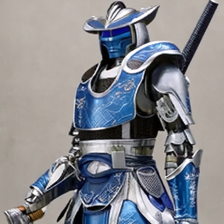

In [ ]:
gmk.generate(PROMPT1)

INFO:GenMK:Generating image of Mortal Kombat character...


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:GenMK:Generated image of Mortal Kombat character


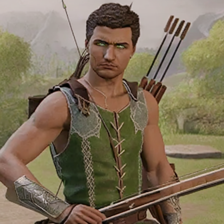

In [ ]:
gmk.generate(PROMPT2)

INFO:GenMK:Generating image of Mortal Kombat character...


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:GenMK:Generated image of Mortal Kombat character


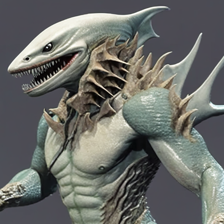

In [ ]:
gmk.generate(PROMPT3)

## Generate images of new Mortal Kombat characters (without fine-tuning)

Base Stable Diffusion model generates images of new Mortal Kombat characters from provided descriptions.

In [ ]:
pipeline = StableDiffusionXLPipeline.from_pretrained(
    'stabilityai/stable-diffusion-xl-base-1.0', torch_dtype=torch.float32)
pipeline = pipeline.to(torch.device(
    'cuda' if torch.cuda.is_available() else 'cpu'))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.safetens(…):   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

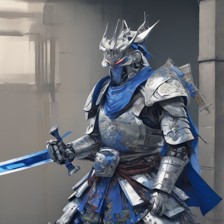

In [ ]:
pipeline(PROMPT1).images[0].resize((224, 224))

  0%|          | 0/50 [00:00<?, ?it/s]

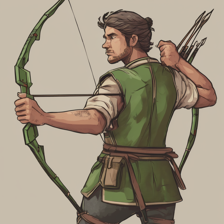

In [ ]:
pipeline(PROMPT2).images[0].resize((224, 224))

  0%|          | 0/50 [00:00<?, ?it/s]

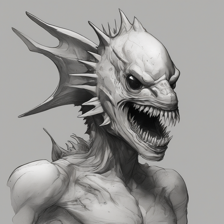

In [ ]:
pipeline(PROMPT3).images[0].resize((224, 224))

## Analysis

The images generated with the fine-tuned Stable Diffusion model fit the Mortal Kombat aesthetic better than the images generated with the base Stable Diffusion model.

For reference, some ground-truth images of Mortal Kombat characters (as they appear in the game *Mortal Kombat 11*) are shown below.

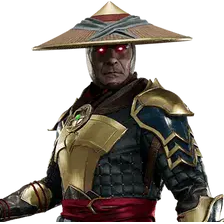

In [ ]:
get_formatted_img('./mk_char_imgs/raiden.png', resolution=224)

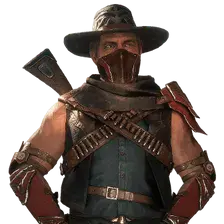

In [ ]:
get_formatted_img('./mk_char_imgs/erron_black.png', resolution=224)

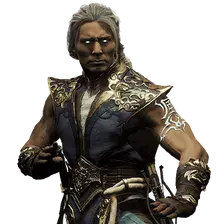

In [ ]:
get_formatted_img('./mk_char_imgs/fujin.png', resolution=224)